In [25]:
import pandas
import numpy as np
Matriz=pandas.read_csv('Panguilemo.csv',sep='|')
Matriz

,Unnamed: 0,momento,rrInst,rr6Horas,rr24Horas,hr,p0,qfe1,qff,qnh,...,td,tMin12Horas,tMax12Horas,Anno,Mes,Dia,Hora,Minuto,Hora_Min_t,Hora_Max_t
0,0,2018-01-01 00:00:00,0.0,0.0,0.0,36.8,1001.3,1001.5,1014.1,1014.5,...,8.5,16.0,29.9,2018,1,1,0,0,12,21
1,1,2018-01-01 00:01:00,0.0,0.0,0.0,37.1,1001.3,1001.6,1014.2,1014.6,...,8.5,16.0,29.9,2018,1,1,0,1,12,21
2,2,2018-01-01 00:02:00,0.0,0.0,0.0,37.7,1001.3,1001.4,1014.0,1014.5,...,8.5,16.0,29.9,2018,1,1,0,2,12,21
3,3,2018-01-01 00:03:00,0.0,0.0,0.0,37.1,1001.4,1001.5,1014.1,1014.5,...,8.5,16.0,29.9,2018,1,1,0,3,12,21
4,4,2018-01-01 00:04:00,0.0,0.0,0.0,38.1,1001.4,1001.6,1014.2,1014.6,...,8.7,16.0,29.9,2018,1,1,0,4,12,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997209,998301,2019-12-19 11:11:00,0.0,0.0,0.0,83.9,1000.8,1001.1,1014.1,1014.1,...,13.3,19.7,31.4,2019,12,19,11,11,12,20
997210,998302,2019-12-19 11:12:00,0.0,0.0,0.0,83.2,1000.8,1000.9,1013.9,1014.0,...,13.4,19.7,31.4,2019,12,19,11,12,12,20
997211,998303,2019-12-19 11:13:00,0.0,0.0,0.0,83.3,1000.8,1000.9,1013.8,1013.9,...,13.2,19.7,31.4,2019,12,19,11,13,12,20
997212,998304,2019-12-19 11:14:00,0.0,0.0,0.0,83.5,1000.7,1001.0,1014.0,1014.0,...,13.4,19.7,31.4,2019,12,19,11,14,12,20


In [28]:
Matriz_Informacion_general=Matriz.loc[:,['rr6Horas','rr24Horas','radiacionGlobalAcumulada24Horas',
                                  'tMin12Horas','tMax12Horas','Mes','Hora','Hora_Min_t','Hora_Max_t']]
Matriz_Informacion_general.columns

Index(['rr6Horas', 'rr24Horas', 'radiacionGlobalAcumulada24Horas',
       'tMin12Horas', 'tMax12Horas', 'Mes', 'Hora', 'Hora_Min_t',
       'Hora_Max_t'],
      dtype='object')

In [29]:
Matriz_Resultados=Matriz.loc[:,'ts']
len(Matriz_Resultados)

997214

In [30]:
dea=20#cada cuantos minutos consideramos valor
Matriz_Informacion_general=Matriz_Informacion_general.loc[range(0,len(Matriz_Resultados),dea),:].reset_index().drop('index',axis=1)
Matriz_Resultados=Matriz_Resultados.loc[range(0,len(Matriz_Resultados),dea)].reset_index().drop('index',axis=1)
len(Matriz_Resultados)

49861

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [74]:
np.asarray([0,12,0])

array([ 0, 12,  0])

In [96]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados,trend='c',order=(3,0,0),enforce_stationarity=False)
res = mod.fit_constrained({'ar.L1': 0})
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                49861
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -68566.411
Date:                Mon, 03 Aug 2020   AIC                         137140.822
Time:                        13:08:11   BIC                         137176.090
Sample:                             0   HQIC                        137151.871
                              - 49861                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.1984      0.010     19.757      0.000       0.179       0.218
ar.L1 (fixed)          0        nan        nan        nan         nan         nan
ar.L2             1.7339      0.005    3

In [6]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados,order=(0,0,0),trend='c')
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                49861
Model:                        SARIMAX   Log Likelihood             -170061.034
Date:                Mon, 03 Aug 2020   AIC                         340126.069
Time:                        10:54:16   BIC                         340143.703
Sample:                             0   HQIC                        340131.593
                              - 49861                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.4008      0.034    424.719      0.000      14.334      14.467
sigma2        53.7062      0.384    140.008      0.000      52.954      54.458
Ljung-Box (Q):                   757918.78   Jarque-

In [7]:
Res2=Matriz_Resultados.loc[:,:]
Res2['Prediccion']=res.predict()
Res2['Residuos']=Res2['Prediccion']-Res2['ts']

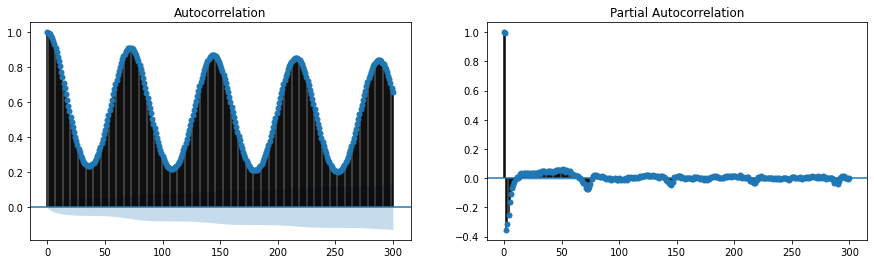

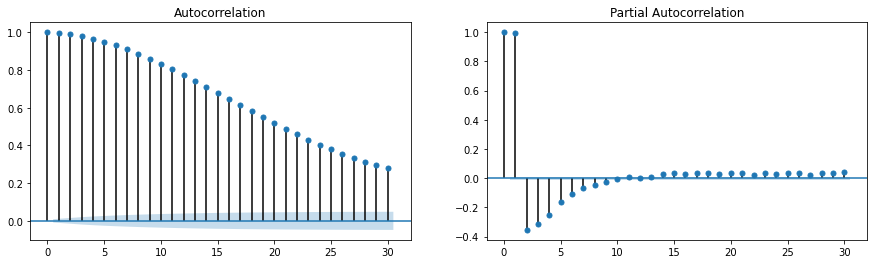

In [8]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=300, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=300, ax=axes[1])
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=30, ax=axes[1])

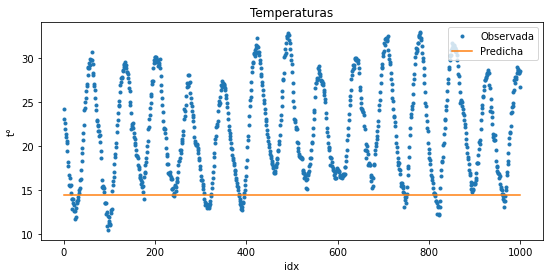

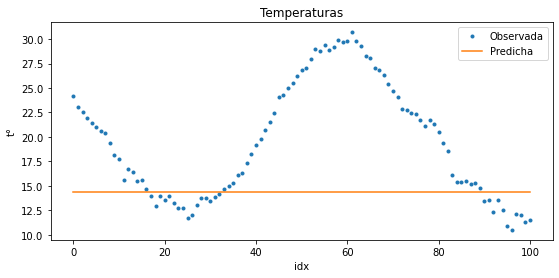

In [9]:
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:1000]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:100]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')

In [10]:
Matriz_Informacion_general

,rr6Horas,rr24Horas,radiacionGlobalAcumulada24Horas,tMin12Horas,tMax12Horas,Mes,Hora,Hora_Min_t,Hora_Max_t
0,0.0,0.0,472.2,16.0,29.9,1,0,12,21
1,0.0,0.0,472.2,16.0,29.9,1,0,12,21
2,0.0,0.0,472.2,16.0,29.9,1,0,12,21
3,0.0,0.0,472.2,16.0,29.9,1,1,12,21
4,0.0,0.0,472.2,16.0,29.9,1,1,12,21
...,...,...,...,...,...,...,...,...,...
49856,0.0,0.0,443.4,19.7,31.4,12,9,12,20
49857,0.0,0.0,443.4,19.7,31.4,12,9,12,20
49858,0.0,0.0,443.4,19.7,31.4,12,10,12,20
49859,0.0,0.0,443.4,19.7,31.4,12,10,12,20


In [11]:
#### Informacion General:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']>=k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])
IG=np.asarray(IG)
#Pendiente revisar importanica de horario de maxima y minima temperatura

In [12]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados['ts'],order=(0,0,0),trend='c',exog=IG)
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                49861
Model:                        SARIMAX   Log Likelihood             -122084.649
Date:                Mon, 03 Aug 2020   AIC                         244257.299
Time:                        10:56:04   BIC                         244645.246
Sample:                             0   HQIC                        244378.837
                              - 49861                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.992e-14      0.122   6.54e-13      1.000      -0.240       0.240
x1            -1.1290      0.127     -8.921      0.000      -1.377      -0.881
x2            -0.9790      0.123     -7.970      0.0

In [13]:
Res2=Matriz_Resultados.loc[:,:]
Res2['Prediccion']=res.predict()
Res2['Residuos']=Res2['Prediccion']-Res2['ts']

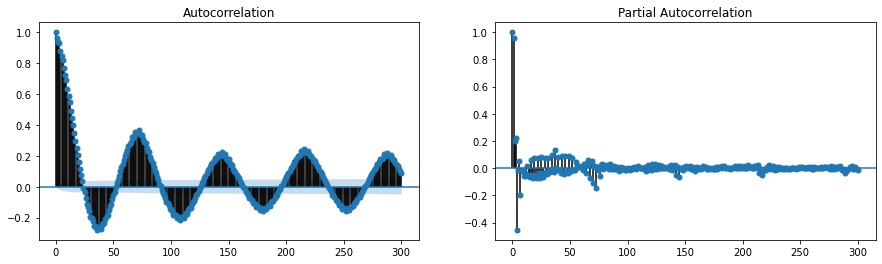

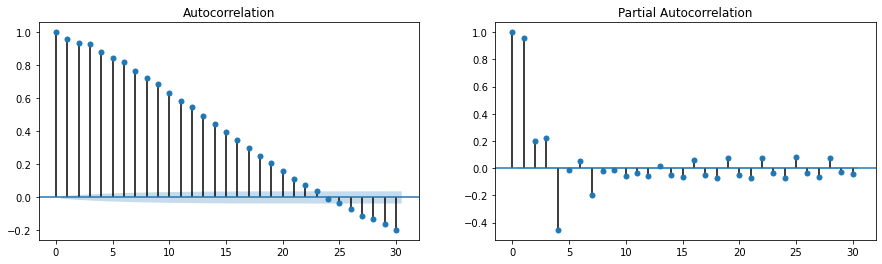

In [14]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=300, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=300, ax=axes[1])
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=30, ax=axes[1])

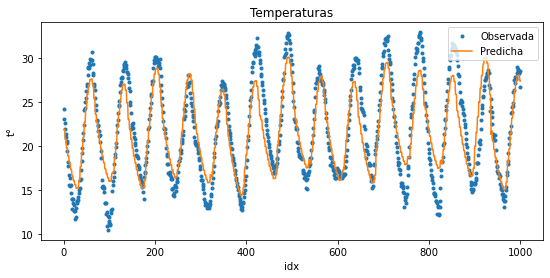

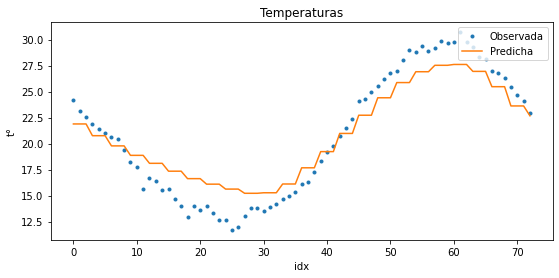

In [15]:
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:1000]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:72]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')

In [16]:
####Incorporando pasado
Delay=60*24/dea

In [17]:
#### Informacion General:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']>=k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])
IG['ts']=1*(Matriz_Resultados['ts'].copy())
IG=IG.loc[0:len(IG)-Delay-1]
IG=np.asarray(IG)

In [18]:
Matriz_Resultados=Matriz_Resultados.loc[Delay:].reset_index()

In [19]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados['ts'],order=(0,0,0),
                                trend='c',exog=IG)
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                     ts   No. Observations:                49789
Model:                        SARIMAX   Log Likelihood             -119547.300
Date:                Mon, 03 Aug 2020   AIC                         239184.601
Time:                        10:57:57   BIC                         239581.301
Sample:                             0   HQIC                        239308.890
                              - 49789                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    5.28e-15      0.124   4.26e-14      1.000      -0.243       0.243
x1            -0.5282      0.099     -5.309      0.000      -0.723      -0.333
x2            -0.4420      0.099     -4.474      0.0

In [20]:
Res2=Matriz_Resultados.loc[:,:]
Res2['Prediccion']=res.predict()
Res2['Residuos']=Res2['Prediccion']-Res2['ts']

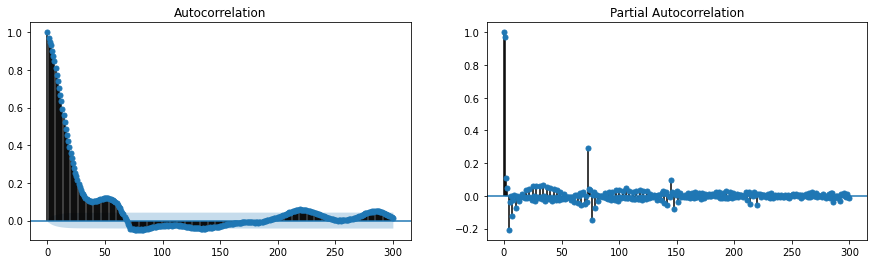

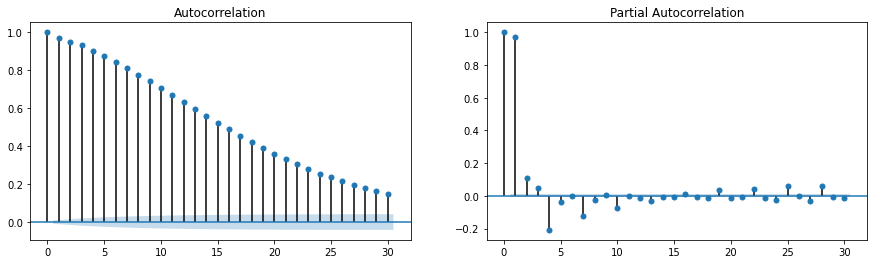

In [21]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=300, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=300, ax=axes[1])
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=30, ax=axes[1])

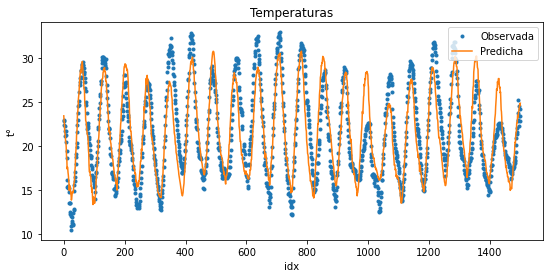

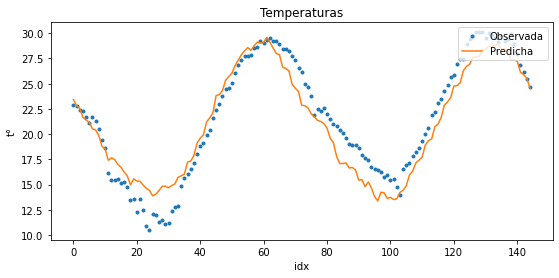

In [22]:
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:1500]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:144]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')

In [23]:
##### incorporando valor de hace 1 hora
S=60/dea
S

3.0

In [ ]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados['ts'],order=(0,0,0),
                                seasonal_order=(1,0,0,S),
                                trend='c',exog=IG)
res = mod.fit(disp=False)
print(res.summary())

In [ ]:
Res2=Matriz_Resultados.loc[:,:]
Res2['Prediccion']=res.predict()
Res2['Residuos']=Res2['Prediccion']-Res2['ts']

In [ ]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=300, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=300, ax=axes[1])
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=30, ax=axes[1])

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:1500]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:144]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')

In [ ]:
####Incorporando pasado estacional
#### Informacion General:
IG=pandas.DataFrame()
for k in range(1,24):
    IG['H'+str(k)]=1*(Matriz_Informacion_general['Hora']>=k)
for k in range(1,12):
    IG['M'+str(k)]=1*(Matriz_Informacion_general['Mes']==k)
IG['Constante']=1*(True)
IG['rr6Horas']=1*(Matriz_Informacion_general['rr6Horas'])
IG['rr24Horas']=1*(Matriz_Informacion_general['rr24Horas'])
IG['radiacionGlobalAcumulada24Horas']=1*(Matriz_Informacion_general['radiacionGlobalAcumulada24Horas'])
IG['tMin12Horas']=1*(Matriz_Informacion_general['tMin12Horas'])
IG['tMax12Horas']=1*(Matriz_Informacion_general['tMax12Horas'])
IG['Hora_Min_t']=1*(Matriz_Informacion_general['Hora_Min_t'])
IG['Hora_Max_t']=1*(Matriz_Informacion_general['Hora_Max_t'])
IG=np.asarray(IG)
#Pendiente revisar importanica de horario de maxima y minima temperatura
Matriz_Resultados=Matriz['ts']
Delay=60*24/dea

In [ ]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(Matriz_Resultados,order=(3,0,0),
                                seasonal_order=(1,0,0,Delay),
                                trend='c',exog=IG)
res = mod.fit(disp=False)
print(res.summary())

In [ ]:
Res2=Matriz_Resultados.loc[:,:]
Res2['Prediccion']=res.predict()
Res2['Residuos']=Res2['Prediccion']-Res2['ts']

In [ ]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=300, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=300, ax=axes[1])
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
fig = sm.graphics.tsa.plot_acf(Res2['Residuos'], lags=30, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(Res2['Residuos'], lags=30, ax=axes[1])

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:1500]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')
fig, ax = plt.subplots(figsize=(9,4))
# Plot data points
Res3=Res2.loc[0:144]
ax.set(title='Temperaturas', xlabel='idx', ylabel='t°')
Res3.loc[:,'ts'].plot(ax=ax, style='.', label='Observada')
Res3.loc[:,'Prediccion'].plot(ax=ax, style='-', label='Predicha')
legend = ax.legend(loc='upper right')